In [1]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import scipy.special

Vi genererar ett stickprov av storlek $1000$ från en $\textrm{Gamma}(10,5)$-population:

(array([ 21., 142., 251., 254., 188.,  81.,  41.,  14.,   6.,   2.]),
 array([0.56116785, 0.97065839, 1.38014892, 1.78963945, 2.19912998,
        2.60862051, 3.01811105, 3.42760158, 3.83709211, 4.24658264,
        4.65607317]),
 <BarContainer object of 10 artists>)

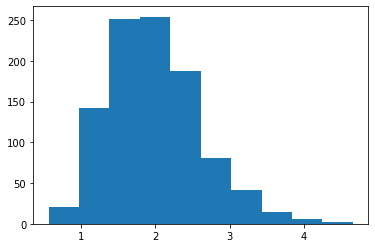

In [181]:
samps = stats.gamma.rvs(size = 1000, a = 10, scale = 1/5)
plt.hist(samps)

### Exempel 6.3

Log-likelihoodfunktionen för stickprovet är

$$
\begin{split}
            \ell(\alpha | \mathbf{x})
            &= \log \prod_{i=1}^{1000}\frac{5^\alpha}{\Gamma(\alpha)}x_i^{\alpha - 1}e^{-5x_i},\\
            &= 1000\alpha\log(5) - 1000\log(\Gamma(\alpha)) + (\alpha - 1)\sum_{i=1}^{1000}\log(x_i) - 5(1000)\overline{x}.
\end{split}
$$

Vi ska börja gradient descent metoden för att skatta ML-skattningen för $\alpha$ med initiering $\alpha_0 = 20$. Vi tar då $20$ iterationer som producerar $\alpha_1,\ldots, \alpha_{20}$ från parameterrummet $\alpha_1,\ldots, \alpha_{20}$ enligt formel

$$
\alpha_{k+1} = \alpha_k - n_kf^\prime(\alpha_k)
$$

där $n_k = 0.01$ är stegets storlek och

$$
f(\alpha) = - \ell^\prime(\alpha | \mathbf{x}) = - 1000\log(5) + (1000)\frac{\Gamma^\prime(\alpha)}{\Gamma(\alpha)} - \sum_{i=1}^{1000}\log(x_i).
$$

Funktionen $f(\alpha)$ definieras som i följande:

In [173]:
def deriv(α, data):
    n = len(data)
    logsum = sum([np.log(x) for x in data])
    
    grad = n*np.log(5) - n*scipy.special.digamma(α) + logsum
    
    return -grad

Följande implementerar gradient descent metoden:

In [185]:
def graddes_alpha(init, stepsize, num_iter, data):
    
    alphas = [init]
    
    for i in range(num_iter):
        alphas = alphas + [alphas[-1] - (stepsize)*deriv(alphas[-1], data)]
        
    return alphas

In [218]:
G = graddes_alpha(20, 0.01, 20, samps)

In [220]:
G

[20,
 12.72367206605674,
 10.116054664474753,
 9.906128468907632,
 9.91672588656003,
 9.916073695278607,
 9.91611346774758,
 9.91611104094024,
 9.916111189012295,
 9.916111179977635,
 9.916111180528882,
 9.916111180495253,
 9.916111180497305,
 9.916111180497179,
 9.91611118049719,
 9.916111180497186,
 9.916111180497188,
 9.916111180497184,
 9.91611118049719,
 9.916111180497186,
 9.916111180497188]

Vi kan plotta $\alpha_1,\ldots,\alpha_{20}$ för att se konvergens:

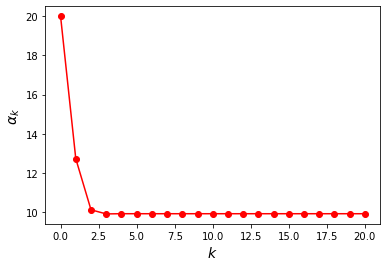

In [236]:
plt.plot(range(len(G)), G, 'o-r')
plt.xlabel('$k$', fontsize=14)
plt.ylabel('$α_k$', fontsize=14)
plt.savefig("grad_des_1_dim.pdf", bbox_inches='tight')
plt.show()

### Exempel 6.4

Nu tar vi $\mathbf{\theta} = [\alpha, \lambda]^T$ och implementera gradient descent metoden för att skatta ML-skattningen för båda parametrar. Eftersom vi har mer än en parameter använder vi gradienten $\nabla f(\mathbf{\theta})$ där $f(\mathbf{\theta}) = - \ell(\alpha, \lambda | \mathbf{x})$.  Gradienten är

$$
\nabla f(\mathbf{\theta}) = 
    \begin{bmatrix}
        -1000\log(\lambda) + n\Psi(\alpha) - \sum_{i = 1}^{1000} \log(x_i)\\
        -\frac{n\alpha}{\lambda} + n\overline{x}
    \end{bmatrix}
$$
där $\Psi(\alpha)$ betecknar digammfunktionen.

Nu tar vi initieringen $\mathbf{\theta} = [8,3]$ och genererar $\mathbf{\theta}_1, \ldots, \mathbf{\theta}_{1000}$ enligt formeln

$$
\mathbf{\theta}_{k+1} = \mathbf{\theta}_k - n_k\nabla f(\mathbf{\theta}_k)
$$

med $n_k = 0.003$.


Gradienten implementeras som i följande:

In [237]:
def grad(θ,data):
    α = θ[0]
    λ = θ[1]
    n = len(data)
    mean = np.mean(data)
    logsum = sum([np.log(x) for x in data])
    
    gradient = np.array([
        -n*np.log(λ) + n*scipy.special.digamma(α) - logsum,
        -n*α/λ + n*mean
    ])
    
    return gradient

Gradient descent metoden implementeras som i följande:

In [238]:
def graddes(init, stepsize, num_iter, data):
    
    thetas = [init]
    
    for i in range(num_iter):
        thetas = thetas + [thetas[-1] - (stepsize)*grad(thetas[-1], data)]
        
    return thetas

In [310]:
initialization = np.array([8,3])
G = graddes(initialization, 0.003, 1000, samps)

In [311]:
Garray = np.array([list(x) for x in G])

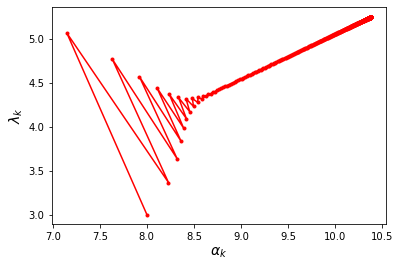

In [312]:
plt.plot(Garray[:,0], Garray[:,1], 'o-r', markersize = 3)
plt.xlabel('$α_k$', fontsize=14)
plt.ylabel('$λ_k$', fontsize=14)
plt.savefig("grad_des_2_dim.pdf", bbox_inches='tight')
plt.show()

Nu försöker vi flera olika val för initieringen och stegets storlek:

In [323]:
initialization1 = np.array([8,3])
G1 = graddes(initialization1, 0.0045, 1000, samps)
G1array = np.array([list(x) for x in G1])

initialization2 = np.array([11,7])
G2 = graddes(initialization2, 0.01, 1000, samps)
G2array = np.array([list(x) for x in G2])

initialization3 = np.array([1,6])
G3 = graddes(initialization3, 0.0003, 1000, samps)
G3array = np.array([list(x) for x in G3])

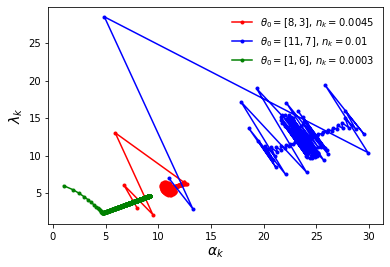

In [328]:
plt.plot(G1array[:,0], G1array[:,1], 'o-r', markersize = 3, label='$θ_0 = [8,3]$, $n_k = 0.0045$')
plt.plot(G2array[:,0], G2array[:,1], 'o-b', markersize = 3, label='$θ_0 = [11,7]$, $n_k = 0.01$')
plt.plot(G3array[:,0], G3array[:,1], 'o-g', markersize = 3, label='$θ_0 = [1,6]$, $n_k = 0.0003$')
plt.xlabel('$α_k$', fontsize=14)
plt.ylabel('$λ_k$', fontsize=14)
plt.legend(loc='best', frameon=False)
plt.savefig("grad_des_2_dim_mult.pdf", bbox_inches='tight')
plt.show()

Vi ser att det är viktigt att testa flera val till initieringen och stegets storlek för att vara säkert att vi har konvergens till ett globalt maximum.